# Linear Poisson equation in 1D
The problem solved is the generic Poisson in 1D and allows you to manually minimize the cost function.

## Importing packages
These packages are required to calculate through the problem and primeraly for the interactive plots.

In [2]:
# Importing required modules.
import matplotlib.pyplot as plt
import numpy as np
from functools import partial

# Importing my own scripts.
from configuration import Configuration
from problem import Hat
from test import Laplace_Dirichlet_Dirichlet
from patch import PatchDatabase
from constitutive import LinearMaterial

# Importing interactive plots.\n",
from __future__ import print_function
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Define generic hat shaped right hand side function representing a prescribed heat flux rate.

In [3]:
def rhs_hats(hats, x):
    gx = np.zeros_like(x)  # Initialize rhs values

    # For each hat in hats we set the appropriate values.
    for hat in hats:
        a, b, value = hat
        index = (a <= x) & (x <= b)
        gx[index] = value
    return gx

## Problem properties
The dimensions and other properties of the properties, including the axis system.

In [4]:
problem_length = 1000.  # Length of the problem in mm.
problem_h = 200.  # Width of the hat function in mm.
problem_rhs = 0.2  # Right hand side heating in W / mm.
problem_a = 0.00  # Left boundary value in degreeC.
problem_b = -5.  # Right boundary value in degreeC.
domain_num = 4  # 16 # Amount subdomains.
domain_length = 287.5  # 109.375 # Length of the subdomains in mm.
problem = Hat(problem_length, problem_h, problem_rhs, problem_a, problem_b, domain_length, domain_num)

# Material definition, required for the test, and verification of the exact solution.
material = LinearMaterial(1000)  # Constant conductivity in W mm / degC

## The reference solution is obtained from a finite difference solution.

/home/bram/.miniconda3/envs/DDM/lib/python3.10/site-packages/scipy/integrate/_bvp.py:1092: RuntimeWarning: invalid value encountered in divide
  r_middle = 1.5 * col_res / h
/home/bram/.miniconda3/envs/DDM/lib/python3.10/site-packages/scipy/integrate/_bvp.py:591: RuntimeWarning: invalid value encountered in divide
  slope = (y[:, 1:] - y[:, :-1]) / h


Text(0.5, 1.0, 'Exact')

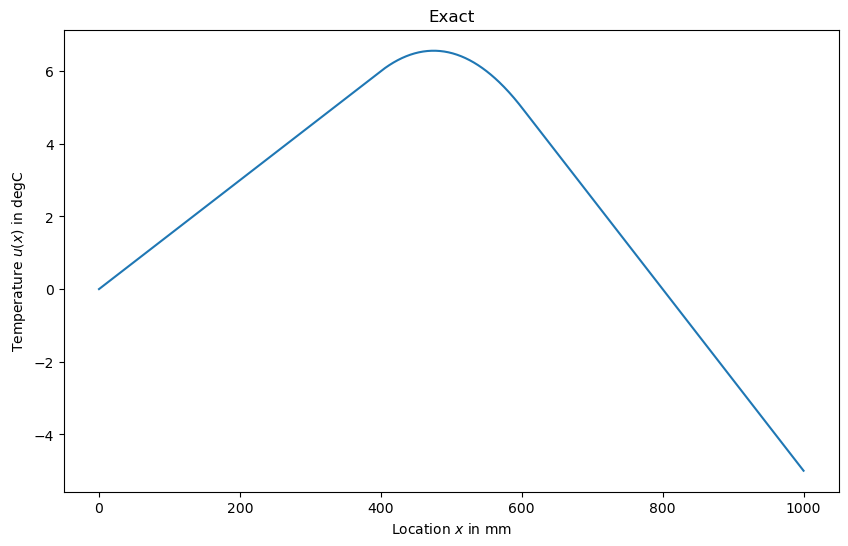

In [5]:
# Exact solution and its plot.
exact_x = np.linspace(0, 1000, 1001)
exact_x, exact_u, exact_rhs = problem.exact(exact_x, material)

# Plot exact solution.
fig = plt.figure(figsize=(10, 6))
plt.plot(exact_x, exact_u)
plt.xlabel(r'Location $x$ in mm')
plt.ylabel(r'Temperature $u(x)$ in degC')
plt.title('Exact')

## Performing tests
We simulate the test of another, shorter rod of the same material, and add it to the database.

In [6]:
# Perform test according to the following test matrix.
specimen_length = 750.  # Specimen length in mm.
specimen_dx = 0.1  # mm discretization step size (measurement spacial resolution)
rhs = partial(rhs_hats, [(0, 25,  -1.0e-1), (50, 200, -3.0e-1), (500, 700,  2.0e-1)])  # rhs in test setup.
test = Laplace_Dirichlet_Dirichlet(specimen_length, specimen_dx, 0., 5., rhs, material)

## Spliting the tested rod into patches
From the rod patches are obtained. These are displacement fields that we know to be internally admissible. Afterall they were observed in "reality". Of the patches we know:
1. The entire thermal field.
2. The heat flux density applied to the patch during testing.

(<AxesSubplot:ylabel='$u(x)$'>,
 <AxesSubplot:xlabel='Location $x$', ylabel='$g(x)$'>)

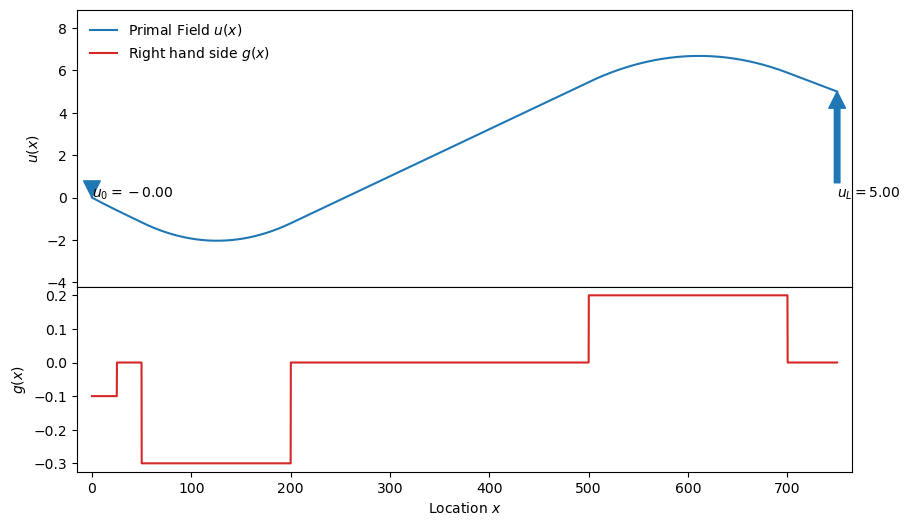

In [7]:
# Create empty database and add test to it.
database = PatchDatabase()
database.add_test(test)
database.mirror()
test.plot()

In [8]:
x = np.linspace(0, problem_length, 10001)  # Spatial discretization in mm.
configuration = Configuration(problem, database)  # From patch admissibility.

## Play around with a configuration.
You can select different configurations and play around with the DOFs

In [18]:
# Define a function to plot a configuration.

def plot_config(optimized,
               q0, r0,
               q1, r1,
               q2, r2,
               q3, r3):
    """
    Plot a configuration and interact with it.
    
    Parameters
    ----------
    optimized : bool
        Whether to use the optimized degrees of freedom.
    * : float
        The parameters of translation, constant displacement and rotation of each domain.
    """
    # Set the rigid body motion addition to displacement.
    rbd = np.array([[q0, r0],
                    [q1, r1],
                    [q2, r2],
                    [q3, r3]])
    configuration.rbd = rbd
    
    # Plot the configuration.
    configuration.plot(x, material=material)
    
# Create interface elements.
# Generic settings.
optimized_selector = widgets.ToggleButton(value=False, description="Optimize configuration")
general_box = widgets.HBox([optimized_selector])

# Domain 0 settings.
q0_selector = widgets.FloatSlider(value=0, min=-5, max=5, step=0.05,
    description='q1', orientation='horizontal',
    readout=True, readout_format='.2f')
r0_selector = widgets.FloatSlider(value=0, min=-1, max=1, step=5e-3,
    description='r1', orientation='horizontal',
    readout=True, readout_format='.3f')
domain0_box = widgets.HBox([q0_selector, r0_selector])

# Domain 1 settings.
q1_selector = widgets.FloatSlider(value=0, min=-5, max=5, step=0.05,
    description='q1', orientation='horizontal',
    readout=True, readout_format='.2f')
r1_selector = widgets.FloatSlider(value=0, min=-1, max=1, step=5e-3,
    description='r1', orientation='horizontal',
    readout=True, readout_format='.3f')
domain1_box = widgets.HBox([q1_selector, r1_selector])

# Domain 2 settings.
q2_selector = widgets.FloatSlider(value=0, min=-5, max=5, step=0.05,
    description='q1', orientation='horizontal',
    readout=True, readout_format='.2f')
r2_selector = widgets.FloatSlider(value=0, min=-1, max=1, step=5e-3,
    description='r1', orientation='horizontal',
    readout=True, readout_format='.3f')
domain2_box = widgets.HBox([q2_selector, r2_selector])

# Domain 3 settings.
q3_selector = widgets.FloatSlider(value=0, min=-5, max=5, step=0.05,
    description='q1', orientation='horizontal',
    readout=True, readout_format='.2f')
r3_selector = widgets.FloatSlider(value=0, min=-1, max=1, step=5e-3,
    description='r1', orientation='horizontal',
    readout=True, readout_format='.3f')
domain3_box = widgets.HBox([q3_selector, r3_selector])

# Move all variables to optimized solutions if requested.
def update_to_optimized(*args):
    if optimized_selector.value is True:
        # Perform optimisation.
        configuration.optimize(x)
        rbd = configuration.rbd

        # Set the optimal values.
        q0_selector.value = rbd[0, 0]
        r0_selector.value = rbd[0, 1]
        q1_selector.value = rbd[1, 0]
        r1_selector.value = rbd[1, 1]
        q2_selector.value = rbd[2, 0]
        r2_selector.value = rbd[2, 1]
        q3_selector.value = rbd[3, 0]
        r3_selector.value = rbd[3, 1]

optimized_selector.observe(update_to_optimized, 'value')

# Combining all.
settings_box = widgets.VBox([general_box, domain0_box, domain1_box, domain2_box, domain3_box])

# Resulting plot.
settings_dict = {'optimized': optimized_selector,
                 'q0': q0_selector, 'r0': r0_selector,
                 'q1': q1_selector, 'r1': r1_selector,
                 'q2': q2_selector, 'r2': r2_selector,
                 'q3': q3_selector, 'r3': r3_selector}
plot = widgets.interactive_output(plot_config, settings_dict)

# Create interaction interface.
display(settings_box, plot)

Output()